<a href="https://colab.research.google.com/github/Otsebolu/Isimeto/blob/master/Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import random

In [35]:
df = pd.read_csv('creditcard.csv',low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,82217.0,0.345846,-0.413349,0.469991,-2.225985,-1.258695,-0.065503,-1.812695,-2.696906,-2.551694,0.637676,0.819735,0.212920,0.704818,0.130754,-0.806258,0.360562,-0.089819,0.445852,-0.903100,0.321418,-1.427304,0.176838,0.010199,-0.016979,0.712779,-0.330147,0.015302,0.135722,30.00,0
1,60434.0,-1.892919,1.587756,0.508562,-1.638284,-0.464246,-0.207836,-0.122353,0.624957,0.662515,0.627438,0.972833,0.390074,-0.829065,0.256041,0.217591,0.695738,-0.620295,-0.155191,-0.786601,0.172402,-0.030179,-0.243443,0.073874,-0.307304,-0.212020,0.721419,-0.185343,0.176103,3.84,0
2,72003.0,-1.600199,0.390108,2.252693,1.839567,-1.065600,0.533475,1.020853,-0.010838,0.207497,-0.073385,-1.293510,0.044484,-0.382612,-1.019140,-2.248783,0.275434,-0.340601,-0.379396,-1.559523,-0.446387,0.031740,0.675485,-0.463539,0.775580,-0.053650,-0.121285,-0.345081,-0.582699,220.22,0
3,144289.0,0.012875,0.801628,0.198690,-0.516544,0.300367,-0.962779,1.255601,-0.352033,-0.128869,-0.559655,-0.946362,0.321931,0.319616,0.003525,-0.704243,-0.258428,-0.336496,-0.815953,0.001031,-0.170859,-0.152550,-0.361403,0.040037,0.067693,-0.442533,0.184836,-0.115389,0.020179,46.57,0
4,137335.0,-0.509963,-0.887694,1.093469,-3.499264,0.514873,1.561013,-0.767034,0.732638,-0.136594,-0.671083,0.705552,0.984109,0.765857,-0.454817,-0.127053,-1.325290,-0.393180,0.602007,-2.671274,-0.580323,-0.044412,0.377788,0.280016,-0.729840,-1.403927,0.277958,0.234520,0.216127,20.91,0


In [38]:
fraud = df.loc[df['Class']==1]
non_frauds = df.loc[df['Class']==0]
print(len(fraud))
print(len(non_frauds))

492
284315


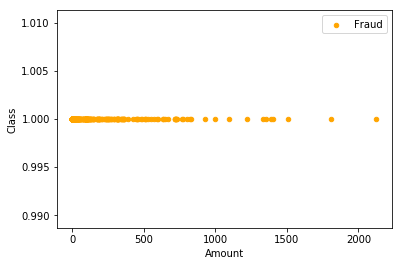

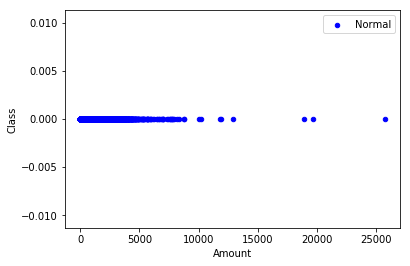

In [39]:
ax = fraud.plot.scatter(x='Amount',y='Class', color ='Orange',label='Fraud')
non_frauds.plot.scatter(x='Amount',y='Class', color ='Blue',label='Normal')
plt.show()


In [0]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split


In [0]:
x = df.iloc[:,:-1]
y = df['Class']
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size= 0.20)


In [42]:
logistic = linear_model.LogisticRegression(C=1e-5)
logistic.fit(X_train,y_train)
print('Score:', logistic.score(X_test,y_test))



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score: 0.9985779993679997


In [43]:
y_predicted = np.array(logistic.predict(X_test))
print(y_predicted)

[0 0 0 ... 0 0 0]


In [47]:
 from sklearn.metrics import classification_report
 print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       0.71      0.06      0.11        84

    accuracy                           1.00     56962
   macro avg       0.86      0.53      0.55     56962
weighted avg       1.00      1.00      1.00     56962

